# 4.4 連続型確率分布

In [2]:
using Distributions
using PyPlot

In [10]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.4.3 多変量正規分布

In [6]:
# パラメータ
μ = [0.0, 0.0]
Σ = [1.0 0.0;
     0.0 1.0]

d = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 0.0; 0.0 1.0]
)


In [7]:
# サンプリング
X = rand(d, 1000)
X

2×1000 Matrix{Float64}:
 -1.21049   0.673429  -0.282777  0.356209  …  1.0325    2.08078    0.675447
  0.71573  -0.294934   1.69928   0.52092      1.67551  -0.708122  -1.13925

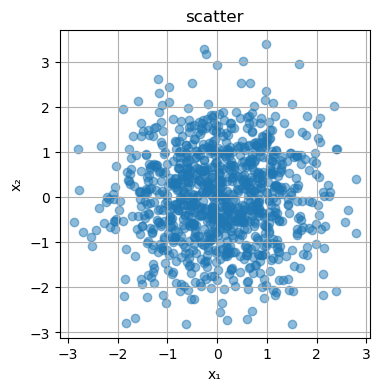

In [11]:
fig, ax = subplots(figsize=(4,4))
ax.scatter(X[1,:], X[2,:], alpha=0.5)
set_options(ax, "x₁", "x₂", "scatter")

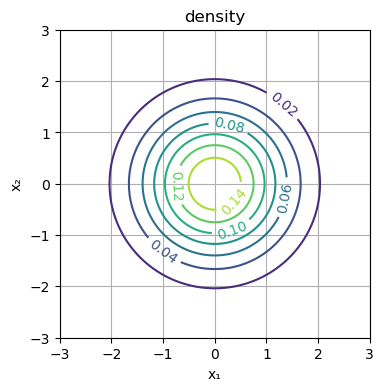

In [12]:
x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)

fig, ax = subplots(figsize=(4,4))
cs = ax.contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
ax.clabel(cs, inline=true)
set_options(ax, "x₁", "x₂", "density")

In [20]:
μ = [0.0, 0.0]
Σ = [1.0 0.5;
     0.5 1.0]
d = MvNormal(μ, Σ)
X = rand(d, 1000)

2×1000 Matrix{Float64}:
 -0.240232  0.501899  -1.89998   -0.409032  …  -0.293909   0.569059  1.26444
  0.304602  0.658036   0.341805   0.571477     -1.66104   -1.05508   1.31046

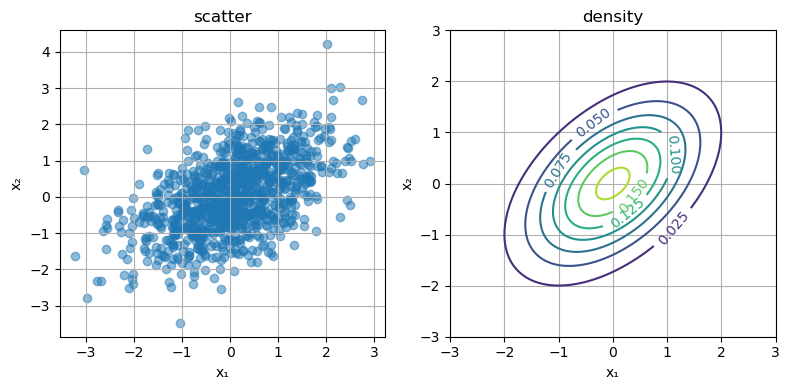

In [21]:
fig, axes = subplots(1,2,figsize=(8,4))

axes[1].scatter(X[1,:], X[2,:], alpha=0.5)
set_options(axes[1], "x₁", "x₂", "scatter")

x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)
cs = axes[2].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")
tight_layout()

In [22]:
μ = [0.0, 0.0]
Σ = [1.0 -0.5;
     -0.5 1.0]
d = MvNormal(μ, Σ)
X = rand(d, 1000)

2×1000 Matrix{Float64}:
 -0.842622  0.0932836  -1.20275   …   0.704458  -1.00567    -0.633633
  0.567229  0.012845   -0.137935     -1.12034   -0.0925001   0.453346

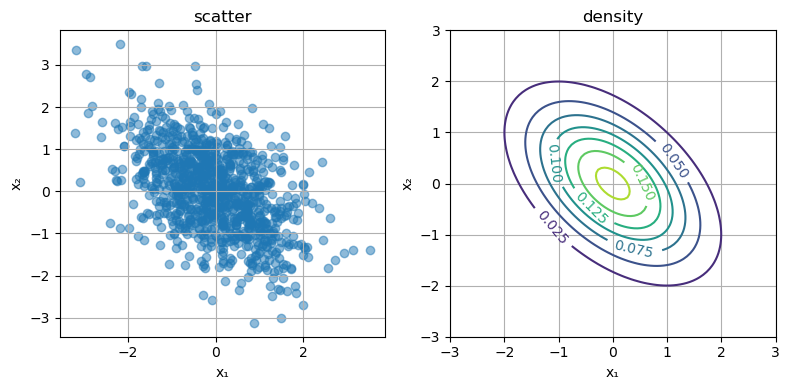

In [23]:
fig, axes = subplots(1,2,figsize=(8,4))

axes[1].scatter(X[1,:], X[2,:], alpha=0.5)
set_options(axes[1], "x₁", "x₂", "scatter")

x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)
cs = axes[2].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")
tight_layout()

In [38]:
μ = [0.0, 0.0]
Σ = [1.5 0.25;
     0.25 0.5]
d = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.5 0.25; 0.25 0.5]
)


In [39]:
function approx_integration(x_range, f)
    # 幅
    Δ = x_range[2] - x_range[1]
    
    # 近似された面積と幅を返す
    sum([f(x) * Δ for x in x_range]), Δ
end

approx_integration (generic function with 1 method)

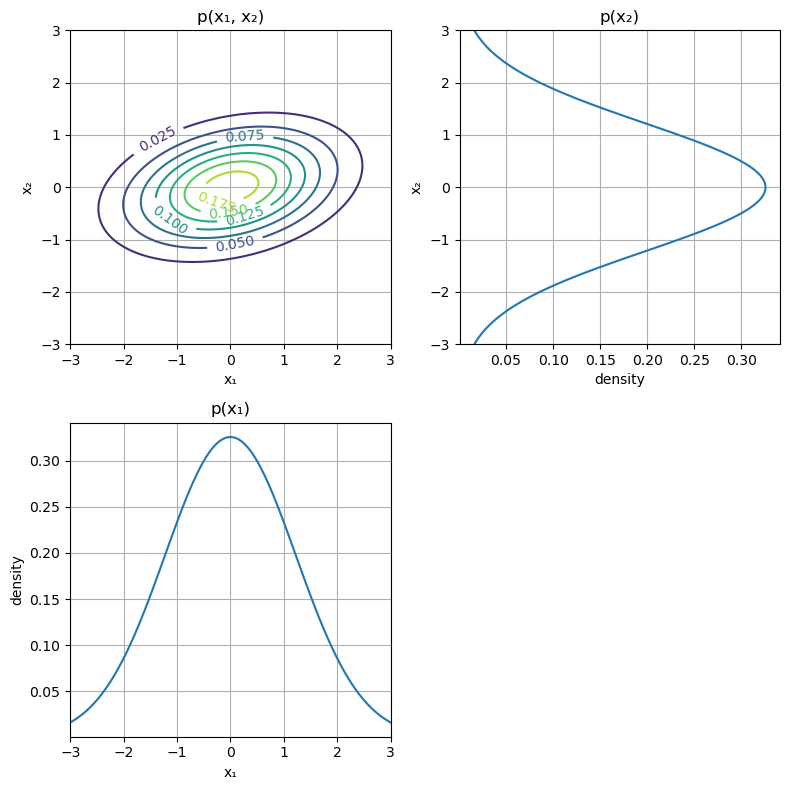

In [40]:
# 同時分布
fig, axes = subplots(2, 2, figsize=(8,8))

cs = axes[1,1].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[1,1].clabel(cs, inline=true)
set_options(axes[1,1], "x₁", "x₂", "p(x₁, x₂)")

# x₁の周辺分布
x_range = range(-3, 3, length=100)
p1_marginal(x₁) = approx_integration(x_range, x₂ -> pdf(d, [x₁, x₂]))[1]
axes[2,1].plot(x₁s, p1_marginal.(x₁s))
axes[2,1].set_xlim([minimum(x₁s), maximum(x₁s)])
set_options(axes[2,1], "x₁", "density", "p(x₁)")

# x₂の周辺分布
x_range = range(-3, 3, length=100)
p2_marginal(x₂) = approx_integration(x_range, x₁ -> pdf(d, [x₁, x₂]))[1]
axes[1,2].plot(p1_marginal.(x₂s), x₂s)
axes[1,2].set_ylim([minimum(x₂s), maximum(x₂s)])
set_options(axes[1,2], "density", "x₂", "p(x₂)")

axes[2,2].axis("off")

tight_layout()

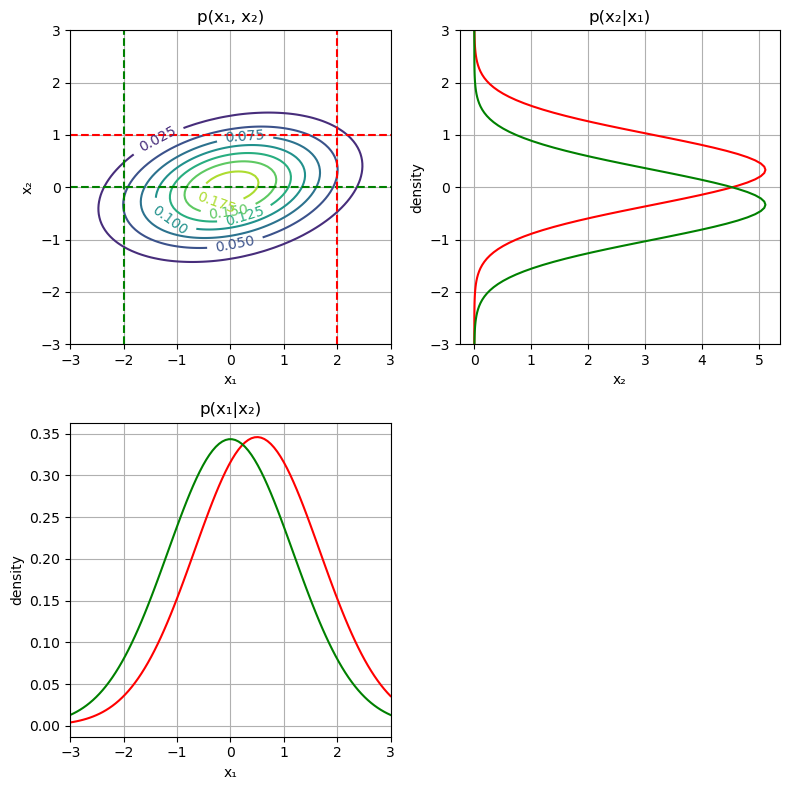

In [41]:
# 同時分布
fig, axes = subplots(2, 2, figsize=(8,8))

cs = axes[1,1].contour(x₁s, x₂s, [pdf(d, [x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
axes[1,1].clabel(cs, inline=true)
set_options(axes[1,1], "x₁", "x₂", "p(x₁, x₂)")

# x₁の条件付き分布 p(x₁|x₂)
x₂ = 1.0
p1_conditional(x₁) = pdf(d, [x₁, x₂]) / p2_marginal(x₂)
axes[1,1].plot([minimum(x₁s), maximum(x₁s)], [x₂, x₂], "r--")
axes[2,1].plot(x₁s, p1_conditional.(x₁s), "r", label="p(x₁|x₂=$(x₂))")

x₂ = 0.0
p1_conditional(x₁) = pdf(d, [x₁, x₂]) / p2_marginal(x₂)
axes[1,1].plot([minimum(x₁s), maximum(x₁s)], [x₂, x₂], "g--")
axes[2,1].plot(x₁s, p1_conditional.(x₁s), "g", label="p(x₁|x₂=$(x₂))")

axes[2,1].set_xlim([minimum(x₁s), maximum(x₁s)])
set_options(axes[2,1], "x₁", "density", "p(x₁|x₂)")

# x₂の条件付き分布 p(x₂|x₁)
x₁ = 2.0
p1_conditional(x₂) = pdf(d, [x₁, x₂]) / p2_marginal(x₁)
axes[1,1].plot([x₁, x₁], [minimum(x₂s), maximum(x₂s)], "r--")
axes[1,2].plot(p1_conditional.(x₂s), x₂s, "r", label="p(x₂|x₁=$(x₁))")

x₁ = -2.0
p1_conditional(x₂) = pdf(d, [x₁, x₂]) / p2_marginal(x₁)
axes[1,1].plot([x₁, x₁], [minimum(x₂s), maximum(x₂s)], "g--")
axes[1,2].plot(p1_conditional.(x₂s), x₂s, "g", label="p(x₂|x₁=$(x₁))")

axes[1,2].set_ylim([minimum(x₂s), maximum(x₂s)])
set_options(axes[1,2], "x₂", "density", "p(x₂|x₁)")

axes[2,2].axis("off")

tight_layout()